# DIC Phase 1
## Prof. Eric Mikida
### Yashika Nihalani, 50425015
### Ashutosh Shailesh Bhawsar, 50416025

In [5]:
import pandas as pd

import time

import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime

import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

# **DATA CLEANING AND PREPROCESSING**

In [7]:
btc_min_data = pd.read_csv('/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

print(btc_min_data)

          Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0        1325317920      4.39      4.39      4.39      4.39      0.455581   
1        1325317980       NaN       NaN       NaN       NaN           NaN   
2        1325318040       NaN       NaN       NaN       NaN           NaN   
3        1325318100       NaN       NaN       NaN       NaN           NaN   
4        1325318160       NaN       NaN       NaN       NaN           NaN   
...             ...       ...       ...       ...       ...           ...   
4857372  1617148560  58714.31  58714.31  58686.00  58686.00      1.384487   
4857373  1617148620  58683.97  58693.43  58683.97  58685.81      7.294848   
4857374  1617148680  58693.43  58723.84  58693.43  58723.84      1.705682   
4857375  1617148740  58742.18  58770.38  58742.18  58760.59      0.720415   
4857376  1617148800  58767.75  58778.18  58755.97  58778.18      2.712831   

         Volume_(Currency)  Weighted_Price  
0                 2.000000    

In [8]:

print(btc_min_data.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')


**1) Conversion of Unix time to Datetime - Timestamp column** - 
The timestamp column is provided in unix time which means number of seconds that have elapsed since January 1, 1970. We have converted this column in datetime format which is more readable and helps in visualising the data according to date and corresponding time in minutes.

In [9]:
# 1) Conversion of Unix time to Datetime - Timestamp column
btc_min_data['Timestamp']=pd.to_datetime(btc_min_data['Timestamp'],unit='s')

In [10]:
btc_min_data=btc_min_data.rename(columns={'Volume_(BTC)':"Volume_BTC", 'Volume_(Currency)':"Volume_Currency"})

**2) Dropping all NAN or null values** - Few columns contained NAN values which are of no significant use for analysis. Hence the rows with such values are deleted. The pandas function dropna is used which determines the NAN values and drops them from the dataset.

In [11]:
# 2) Dropping all NAN or null values
btc_min_data=btc_min_data.dropna()

In [12]:
btc_min_data

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [13]:
# Create new dataframe for final data
bitcoin_daily_data = pd.DataFrame({})
temp_group_data = btc_min_data.groupby([pd.Grouper(key="Timestamp", freq="D")])

**3) Grouping open column -** The data is for every minute, we have grouped it according to day by providing the parameter frequency= “D”. Thus all the data of a particular date are grouped together. The first available data in the dataset for that particular day is considered for the open column.

In [14]:
# 3) Grouping open column
bitcoin_daily_data["Open"] = pd.DataFrame(temp_group_data.Open.first())["Open"]


**4) Grouping Close column -** The last available data in the dataset for that particular day is considered for the close column.

In [15]:
# 4) Grouping Close column
bitcoin_daily_data["Close"] = pd.DataFrame(temp_group_data.Close.last())["Close"]


**5) Grouping High column -** The data for the same day are grouped together and the max value for the high column that is the highest of the day is taken.

In [16]:
# 5) Grouping High column
bitcoin_daily_data["High"] = pd.DataFrame(temp_group_data.High.max())["High"]


**6) Grouping Low column -** The minimum value available in the dataset for each day is taken for the low column.

In [17]:
# 6) Grouping Low column
bitcoin_daily_data["Low"] = pd.DataFrame(temp_group_data.Low.min())["Low"]


**7)Grouping Volume_BTC, Volume_Currency, and Weighted_price-** The mean data for volume_BTC, volume currency, and weighted price for each day are taken in respective columns.

In [18]:
# 7) Get mean value for Volume_BTC, Volume_Currency, Weighted_Price from datewise group
bitcoin_daily_data["Volume_BTC"] = pd.DataFrame(temp_group_data.Volume_BTC.mean())['Volume_BTC']
bitcoin_daily_data["Volume_Currency"] = pd.DataFrame(temp_group_data.Volume_Currency.mean())["Volume_Currency"]
bitcoin_daily_data["Weighted_Price"] = pd.DataFrame(temp_group_data.Weighted_Price.mean())["Weighted_Price"]


In [19]:
bitcoin_daily_data

,Open,Close,High,Low,Volume_BTC,Volume_Currency,Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.39,4.58,4.58,4.39,23.829470,106.330084,4.471603
2012-01-01,4.58,5.00,5.00,4.58,7.200667,35.259720,4.806667
2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
2012-01-03,5.32,5.29,5.32,5.14,11.004660,58.100651,5.252500
2012-01-04,4.93,5.57,5.57,4.93,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...
2021-03-27,55081.26,55839.42,56686.15,53948.35,1.823877,100884.732367,55193.357260
2021-03-28,55817.85,55790.92,56573.04,54677.51,1.447939,80632.115263,55832.958824
2021-03-29,55790.28,57600.10,58402.68,54892.42,3.732887,213754.555988,56913.993819


**8)Compute and add a column for the change percentage daily-**
We computed the change percentage for each day by comparing the closing price of the current day with the closing price of the previous day. This column will contribute to analyzing the change and dividing the day into a particular category.

In [20]:
# 8) Compute and add a column for the change percentage daily
bitcoin_daily_data["Change_percentage"]=bitcoin_daily_data["Close"].pct_change()*100

In [21]:
bitcoin_daily_data

,Open,Close,High,Low,Volume_BTC,Volume_Currency,Weighted_Price,Change_percentage
Timestamp,,,,,,,,
2011-12-31,4.39,4.58,4.58,4.39,23.829470,106.330084,4.471603,NaN
2012-01-01,4.58,5.00,5.00,4.58,7.200667,35.259720,4.806667,9.170306
2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000,0.000000
2012-01-03,5.32,5.29,5.32,5.14,11.004660,58.100651,5.252500,5.800000
2012-01-04,4.93,5.57,5.57,4.93,11.914807,63.119577,5.208159,5.293006
...,...,...,...,...,...,...,...,...
2021-03-27,55081.26,55839.42,56686.15,53948.35,1.823877,100884.732367,55193.357260,1.376237
2021-03-28,55817.85,55790.92,56573.04,54677.51,1.447939,80632.115263,55832.958824,-0.086856
2021-03-29,55790.28,57600.10,58402.68,54892.42,3.732887,213754.555988,56913.993819,3.242786


**9)Round all integer data in DataFrame to 2 decimal places-**
Having a scale of 6 digits is unnecessary for us since those are the least significant. Hence we round up all integers in our dataset to the scale of 2. 

In [22]:
bitcoin_daily_data = bitcoin_daily_data.round(2)

In [23]:
# 9) Save DataFrame to csv file for space efficiency and convenience
bitcoin_daily_data.to_csv('../data/bitcoin_daily_data_cleaned.csv')


**10)Convert data frame to NumPy-**
Now that the data is cleaned, to make it ready for preprocessing and apply machine learning models, we convert the DataFrame from pandas to NumPy. 

In [24]:
# 10) Convert the DataFrame to NumPy arrays for input/output to training model
x = bitcoin_daily_data.values
x = np.delete(arr=x, obj=1, axis=1) # dropping Close column from input x
print("x:",type(x),x.shape)

y = bitcoin_daily_data["Close"].values
print("y:",type(y),y.shape)

x: <class 'numpy.ndarray'> (3379, 7)
y: <class 'numpy.ndarray'> (3379,)


**11)Divide the data columns into test and train data-**
The entire data is divided into train data and test data. After processing the model with train data, our model will be tested using the test data and hence make predictions.


In [25]:
# 11) Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# **EXPLORATORY DATA ANALYSIS (EDA)**

**1) Describe data to get mathematical insights.**

In [26]:
bitcoin_daily_data.describe()

,Open,Close,High,Low,Volume_BTC,Volume_Currency,Weighted_Price,Change_percentage
count,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3378.000000
mean,4602.417399,4619.687260,4750.700598,4442.507965,10.355643,31790.810193,4605.576496,0.386519
std,8193.870228,8245.987435,8497.261901,7874.336609,8.897324,62753.976370,8207.031563,4.564684
min,3.800000,4.230000,4.380000,1.500000,0.250000,1.230000,4.330000,-48.520000
25%,244.792500,244.940000,249.777500,239.952500,4.670000,1916.185000,244.952500,-1.210000
50%,696.020000,697.120000,716.465000,668.265000,7.620000,6832.005000,697.945000,0.215000
75%,7249.760000,7257.850000,7430.267500,7058.395000,13.112500,36074.510000,7242.892500,1.970000
max,61177.030000,61165.190000,61781.830000,58959.570000,119.520000,950995.600000,60455.840000,40.140000


To look into mathematical insights of data, we have described the data  using the describe() method. It can be inferred that the mean of weighted price is the most and the mean of our added column change percentage is the least. Many other insights, such as the min and max values in each column, can be viewed. 

**2) Get detailed information of data for coding insights.**

In [27]:
bitcoin_daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3379 entries, 2011-12-31 to 2021-03-31
Freq: D
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               3376 non-null   float64
 1   Close              3376 non-null   float64
 2   High               3376 non-null   float64
 3   Low                3376 non-null   float64
 4   Volume_BTC         3376 non-null   float64
 5   Volume_Currency    3376 non-null   float64
 6   Weighted_Price     3376 non-null   float64
 7   Change_percentage  3378 non-null   float64
dtypes: float64(8)
memory usage: 237.6 KB


Using the info method, we can get information about the details, such as the count of all rows in the column, the number of the not null values, and the data type of each column. It is seen that all the columns have data types as float. 

**3) Cumulative returns**

6421.14
Index(['BTC'], dtype='object')


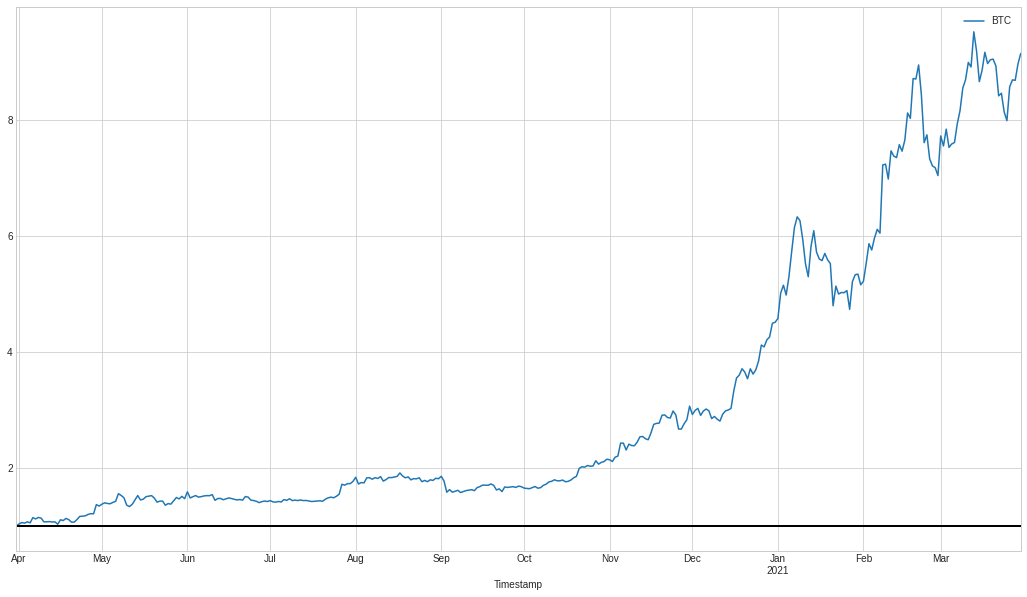

In [28]:
cumulative_returns = pd.DataFrame({})

# Indices to get 1 year data frame, getting first price for data frame
previous_closing_price = bitcoin_daily_data['Close'][-366:-1].iloc[0]
print(previous_closing_price)

# Calculating cumulative daily returns
cumulative_returns['BTC'] = bitcoin_daily_data['Close'][-366:-1]/previous_closing_price
print(cumulative_returns.columns)

# Plotting its graph with base line at y=1 denoting initial investment
cumulative_returns.plot(grid = True, figsize=(18,10)).axhline(y = 1, color = "black", lw=2)

We took the last closing price precisely one year ago. The cumulative daily returns were calculated by dividing the price by the above-calculated closing price.
From the graph, it inferred that starting from April, if USD 1 was invested, in around Jan 2021, it increased to USD 6, and in March 2021, it became 8 times - USD 8

**4) Daily returns**

4.58
Index(['BTC'], dtype='object')


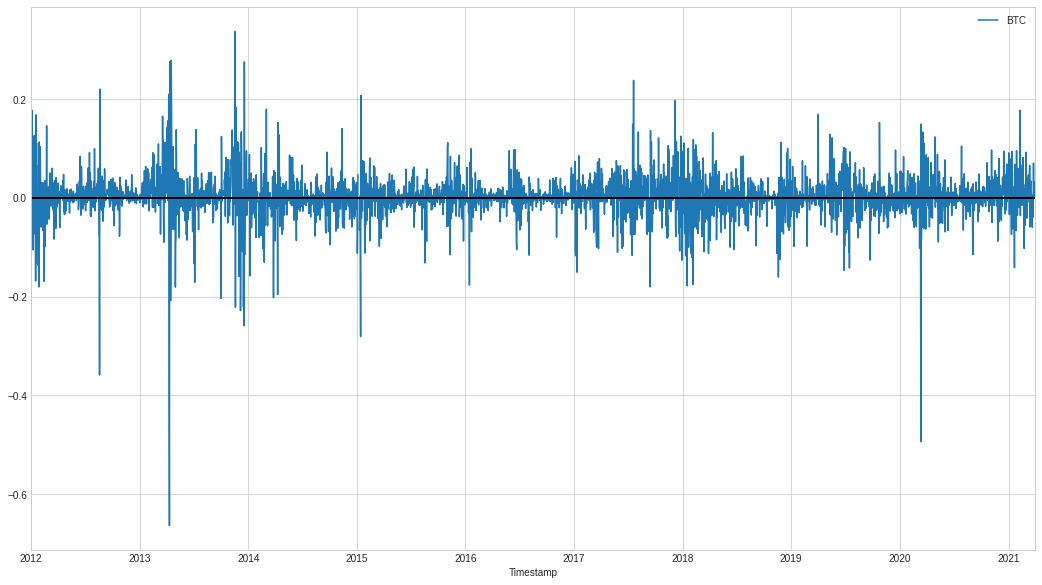

In [29]:
cumulative_returns = pd.DataFrame({})

# Indices to get 1 year data frame, getting first price for data frame
previous_closing_price = bitcoin_daily_data['Close'].iloc[0]
print(previous_closing_price)

# Calculating cumulative daily returns
cumulative_returns['BTC'] = bitcoin_daily_data['Close']/previous_closing_price
print(cumulative_returns.columns)

# Using formula (daily_returns=log(current_price)/log(previous_price)) to calculate daily log returns
daily_returns = cumulative_returns.apply(lambda x: np.log(x/x.shift(1)))

# Plotting its graph with base line at y=1 denoting initial investment
daily_returns.plot(grid = True, figsize=(18,10)).axhline(y = 0, color = "black", lw=2)


Using the formula, the daily log returns are calculated. Logarithmic returns are valid for mathematical finance. One of the advantages is that the logarithmic returns are symmetric. While ordinary returns are not, logarithmic returns of equal magnitude but opposite signs will cancel each other out.
Considering the baseline, we can see from the plot that in around the 4th month of 2013, it's the highest loss which is more than 65%.
In the first two months of 2013 and the last 2 months of 2017, it would have been a good time to invest as the stock price was as high as 25%.


**5) Drawdown**

BTC   -0.848579
dtype: float64


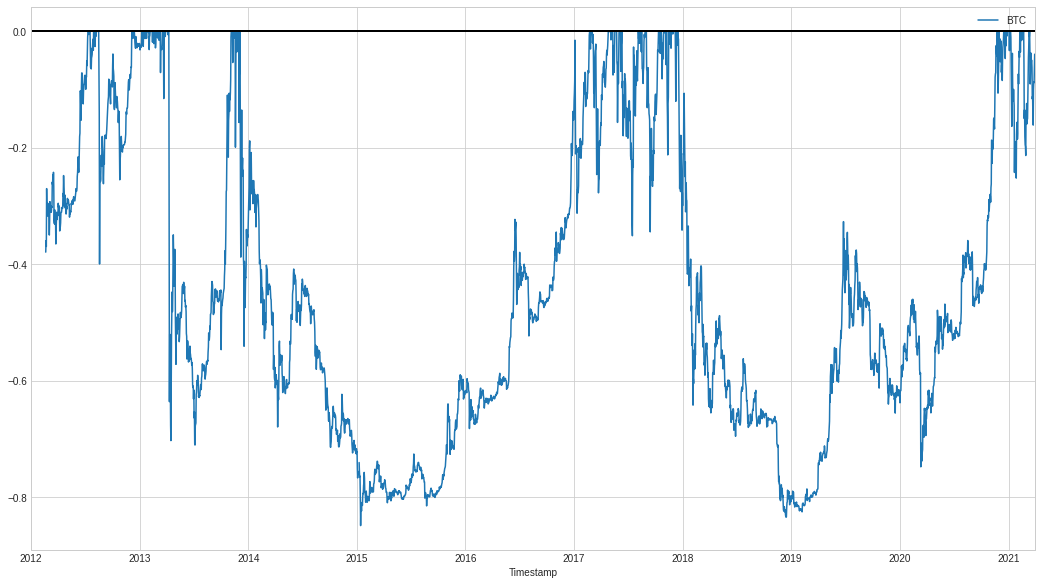

In [30]:

# Computer drawdown each day, return the max drawdown
# Compare each point to the previous running peak
# O(N)
expanding_weeks = 52
running_max = cumulative_returns.expanding(expanding_weeks).max()
cur_dd  = (cumulative_returns - running_max)/running_max

cur_dd.plot(grid = True, figsize=(18,10)).axhline(y = 0, color = "black", lw= 2 )
print(cur_dd.min())


Drawdowns measure the downside volatility of a stock/crypto price. We compare each price point to the previous running peak, which is further used to estimate the historical risks associated with an investment in cryptocurrencies.

**6) Skewness and Kurtosis**

The skewness of the daily returns is:
BTC   -1.415538
dtype: float64

The kurtoses of the daily returns is:
BTC    23.413106
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70d830de50>]],
      dtype=object)

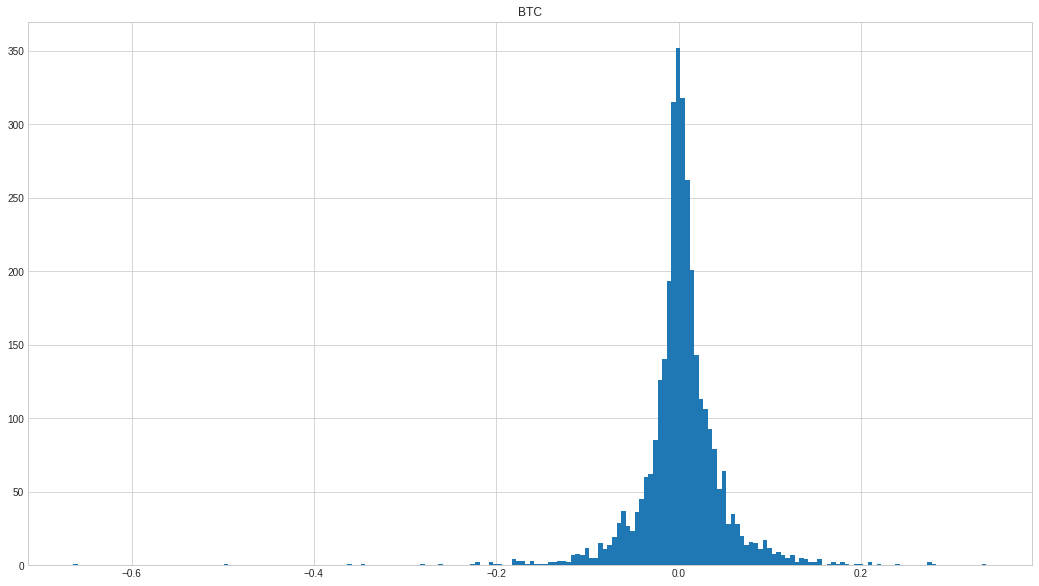

In [31]:
# The skew of any symmetric distribution is zero.

print('The skewness of the daily returns is:\n{}'.format(daily_returns.skew()))


# The kurtosis of any univariate normal distribution is 3.

print('\nThe kurtoses of the daily returns is:\n{}'.format(daily_returns.kurt()))

# Plotting Histogram for 
daily_returns.hist(bins = 200, figsize=(18,10))

Skewness measures the asymmetry of the probability distribution about its mean. Skewness differentiates extreme values in one versus the other tail. Similarly, kurtosis measures extreme values in either tail of the distribution. The base of kurtosis is used as 3. After applying these to our data, we infer that skewness is negative (-1.41), meaning the direction of outliers is on the left(loss) side of the distribution. A high kurtosis value (23.41) implies that the investor will experience occasional extreme returns in either profit or loss.

**7) Correlation analysis**

Text(0.5, 1.0, 'Correlation heatmap:')

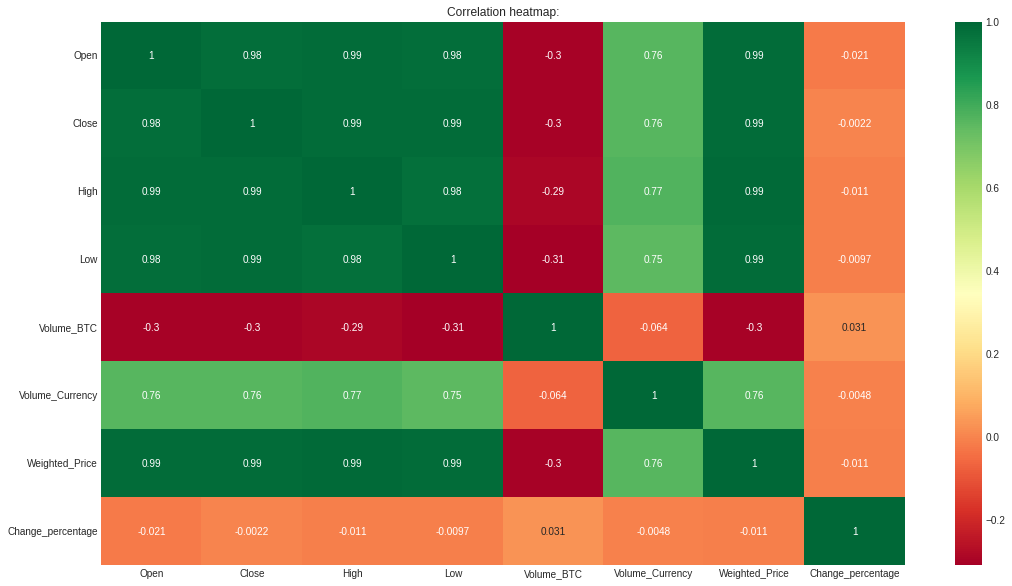

In [32]:
plt.figure(figsize=(18, 10))
sns.heatmap(bitcoin_daily_data[1:].corr(method="kendall"), annot=True, cmap="RdYlGn")
plt.title("Correlation heatmap:")

From the Correlation Analysis graph, it is evident that the following features- High, Weighted Price, Close, Open, Low are strongly correlated. The remaining features - Volume_BTC and Volume_Currency are closely related.

**8) Detection of outliers using boxplots**

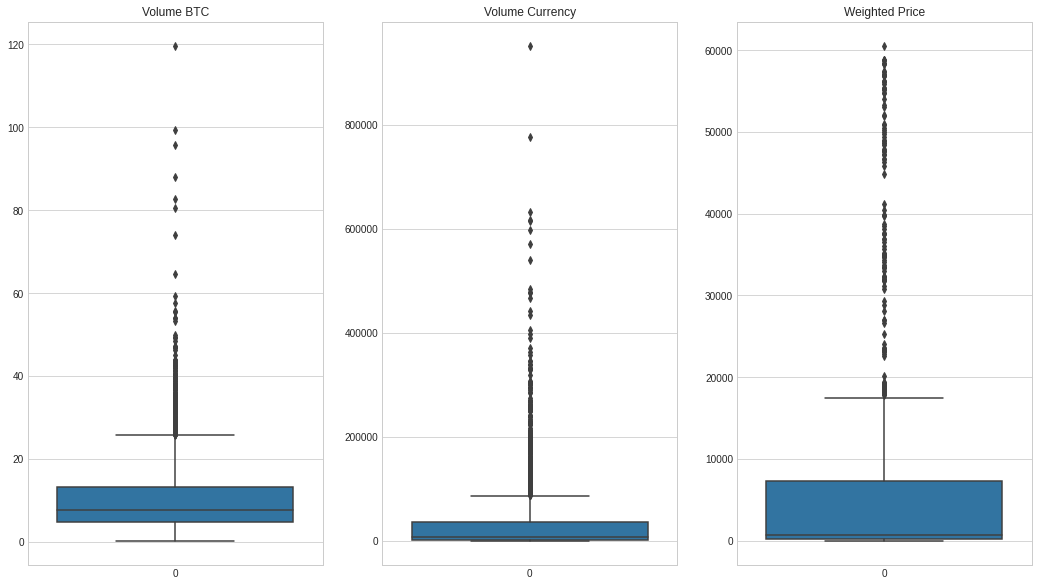

In [33]:
figure, axes = plt.subplots(1, 3, figsize = (18,10))
sns_volume_BTC=sns.boxplot(data=bitcoin_daily_data['Volume_BTC'],ax=axes[0]).set(title='Volume BTC')
sns_volume_currency=sns.boxplot(data=bitcoin_daily_data['Volume_Currency'],ax=axes[1]).set(title='Volume Currency')
sns_volume_weighted_price=sns.boxplot(data=bitcoin_daily_data['Weighted_Price'],ax=axes[2]).set(title='Weighted Price')

Volume BTC- The frequency of the days when 40 to 60 bitcoins were traded is more than the days more than 100 bitcoins were traded. It can be seen that the number of days 120 bitcoins were traded is an outlier and can be removed in further processing.
Volume Currency-  The number of days when USD in a range of 200000 to 600000 were traded is more—the number of days when 800000 USD or more were traded is the least and is an outlier.
Weighted Price- The distribution for the weighted price is almost equal among different ranges, and few outliers can be detected.


**9) SMAs to detect golden and death cross**

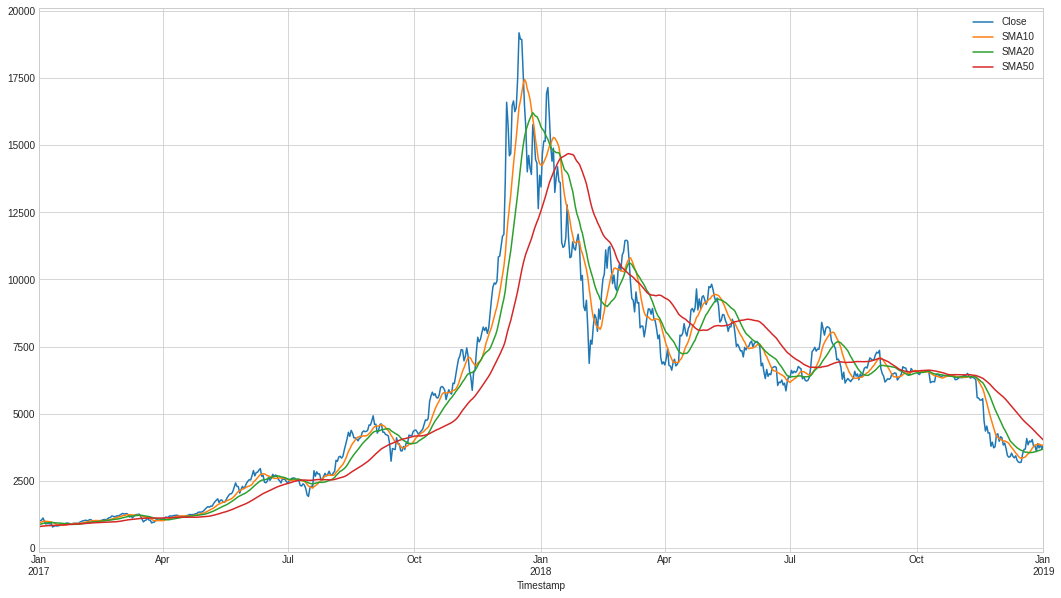

In [34]:
close_df = bitcoin_daily_data["Close"]
bitcoin_daily_data["SMA10"] = close_df.rolling(window=10).mean()
bitcoin_daily_data["SMA20"] = close_df.rolling(window=20).mean()
bitcoin_daily_data["SMA50"] = close_df.rolling(window=50).mean()
start,end = '2017-01-01','2019-01-01'
bitcoin_daily_data.loc[start:end,:][["Close", "SMA10", "SMA20", "SMA50"]].plot(grid = True, figsize=(18,10))

A golden cross is a strong indicator of a bull market. A death cross is a strong indicator of a bear market. This is further used for analysis in the next point.

**10) Adding true labels to dataset based on SMAs**

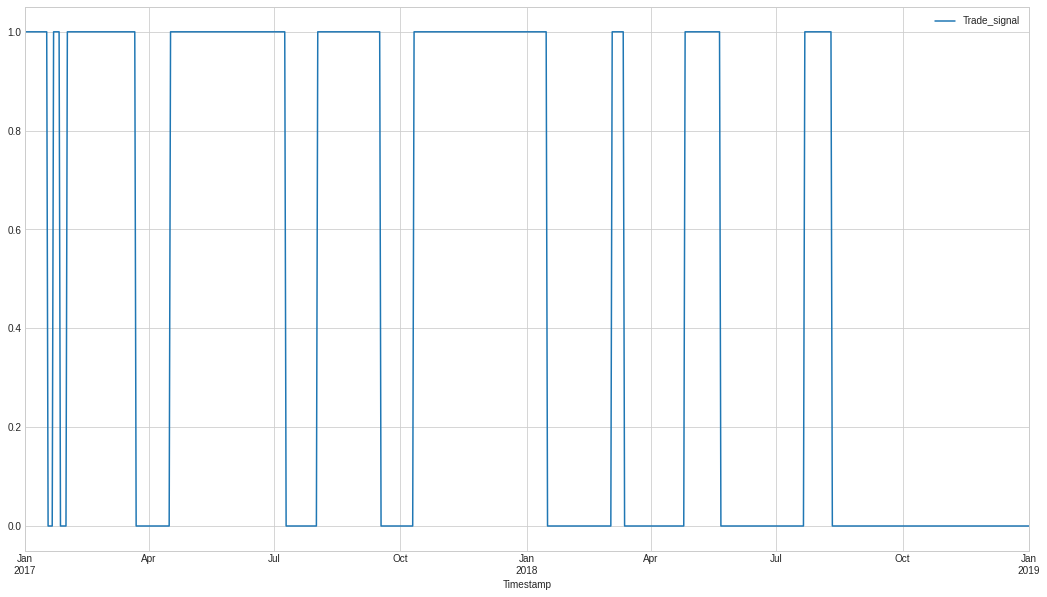

In [35]:
bitcoin_daily_data['Trade_signal'] = np.where((bitcoin_daily_data['SMA10'] > bitcoin_daily_data['SMA50']) & (bitcoin_daily_data['SMA20'] > bitcoin_daily_data['SMA50']), 1.0, 0.0)
bitcoin_daily_data.loc[start:end,:][['Trade_signal']].plot(grid = True, figsize = (18,10))

A new label is assigned to data based on the simple moving average. If the SMA of 10 days and SMA of 20 days are greater than the SMA of 50 days, then accordingly, we are assigning 1 as the label, which signifies a Golden cross. And if the above is invalid, it is assigned as 0, which means death cross.

In [36]:
bitcoin_daily_data

,Open,Close,High,Low,Volume_BTC,Volume_Currency,Weighted_Price,Change_percentage,SMA10,SMA20,SMA50,Trade_signal
Timestamp,,,,,,,,,,,,
2011-12-31,4.39,4.58,4.58,4.39,23.83,106.33,4.47,NaN,NaN,NaN,NaN,0.0
2012-01-01,4.58,5.00,5.00,4.58,7.20,35.26,4.81,9.17,NaN,NaN,NaN,0.0
2012-01-02,5.00,5.00,5.00,5.00,19.05,95.24,5.00,0.00,NaN,NaN,NaN,0.0
2012-01-03,5.32,5.29,5.32,5.14,11.00,58.10,5.25,5.80,NaN,NaN,NaN,0.0
2012-01-04,4.93,5.57,5.57,4.93,11.91,63.12,5.21,5.29,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,55081.26,55839.42,56686.15,53948.35,1.82,100884.73,55193.36,1.38,55420.714,56204.7735,51692.5584,1.0
2021-03-28,55817.85,55790.92,56573.04,54677.51,1.45,80632.12,55832.96,-0.09,55235.001,56372.9295,52022.7348,1.0
2021-03-29,55790.28,57600.10,58402.68,54892.42,3.73,213754.56,56913.99,3.24,55187.811,56506.4835,52397.5690,1.0
